An ant leaves its anthill in order to forage for food. It moves with the speed of 10cm per second, but it doesn’t know where to go, therefore every second it moves randomly 10cm directly north, south, east or west with equal probability.

If the food is located on east-west lines 20cm to the north and 20cm to the south, as well as on north-south lines 20cm to the east and 20cm to the west from the anthill, how long will it take the ant to reach it on average?
What is the average time the ant will reach food if it is located only on a diagonal line passing through (10cm, 0cm) and (0cm, 10cm) points?Can you write a program that comes up with an estimate of average time to find food for any closed boundary around the anthill? What would be the answer if food is located outside an area defined by ( (x – 2.5cm) / 30cm )2 + ( (y – 2.5cm) / 40cm )2 < 1 in coordinate system where the anthill is located at (x = 0cm, y = 0cm)?

Was that easy to solve? If you enjoy mathematical challenges and writing computer programs, you could be instrumental in the success of Optiver's dynamic trading floor as our next Graduate Data Scientist. With your statistics knowledge and top-tier analytical abilities, you’ll create the insights, reports and proposals that drive impactful new trading strategies. Get ready to collaborate with world-class Traders and Software Engineers from more than 50 countries to improve financial markets across the globe. This is your chance to demonstrate how valuable research and data are to the future of electronic trading.

In [240]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy import stats

## Code for the simulations

### Code

In [338]:
def ant_run():
    ant_x = 0
    ant_y = 0
    positions = [(0,0)]
    for step in 10*np.ones(100):
        direction = np.random.choice([-1, 1])
        ns = np.random.choice([0, 1])
        if ns == 1:
            ant_y += direction*step
            positions.append((ant_x,ant_y))
        else:
            ant_x += direction*step
            positions.append((ant_x,ant_y))

        if positions[-1][0]==20 or positions[-1][1] == 20 or positions[-1][0]==-20 or positions[-1][1]==-20:
            return len(positions)-1, positions
        
def simulate(n):
    distribution = []
    for i in range(n):
        distribution.append(ant_run()[0])
    return distribution


def is_normaly_distributed(distribution, alpha=0.05):
    stat, p_value = stats.shapiro(distribution)
    if p_value < alpha:
        print("Reject H0, data is not normal")
    else:
        print("Data is normal")
    return p_value > alpha

def plot_square_sims(title):
    # Create subplots
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))

    # Plot each simulation on a separate subplot
    for i in range(10):
        journey = ant_run()[1]
        x_coords = [point[0] for point in journey]
        y_coords = [point[1] for point in journey]
        ax = axes[i // 5, i % 5]
        ax.plot(x_coords, y_coords, marker='o', linestyle='-')
        ax.set_xlim(-30, 30)
        ax.set_ylim(-30, 30)
        ax.set_aspect('equal', adjustable='box')
        ax.set_title(f'Simulation {i+1}')
        ax.grid(True)

    # Define square coordinates
    square_coords = [(-20, -20), (20, -20), (20, 20), (-20, 20)]

    # Plot the square on each subplot
    for ax in axes.flatten():
        square_patch = patches.Polygon(square_coords, closed=True, edgecolor='red', facecolor='red', alpha=0.1)
        ax.add_patch(square_patch)

    # Set labels and title for the entire figure
    fig.suptitle(title)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.savefig("square_sim.png", dpi=600)
    plt.show()


### Square Border Results

In [342]:
n = 1000000
distribution = simulate(n)
print(np.mean(distribution), "seconds.")

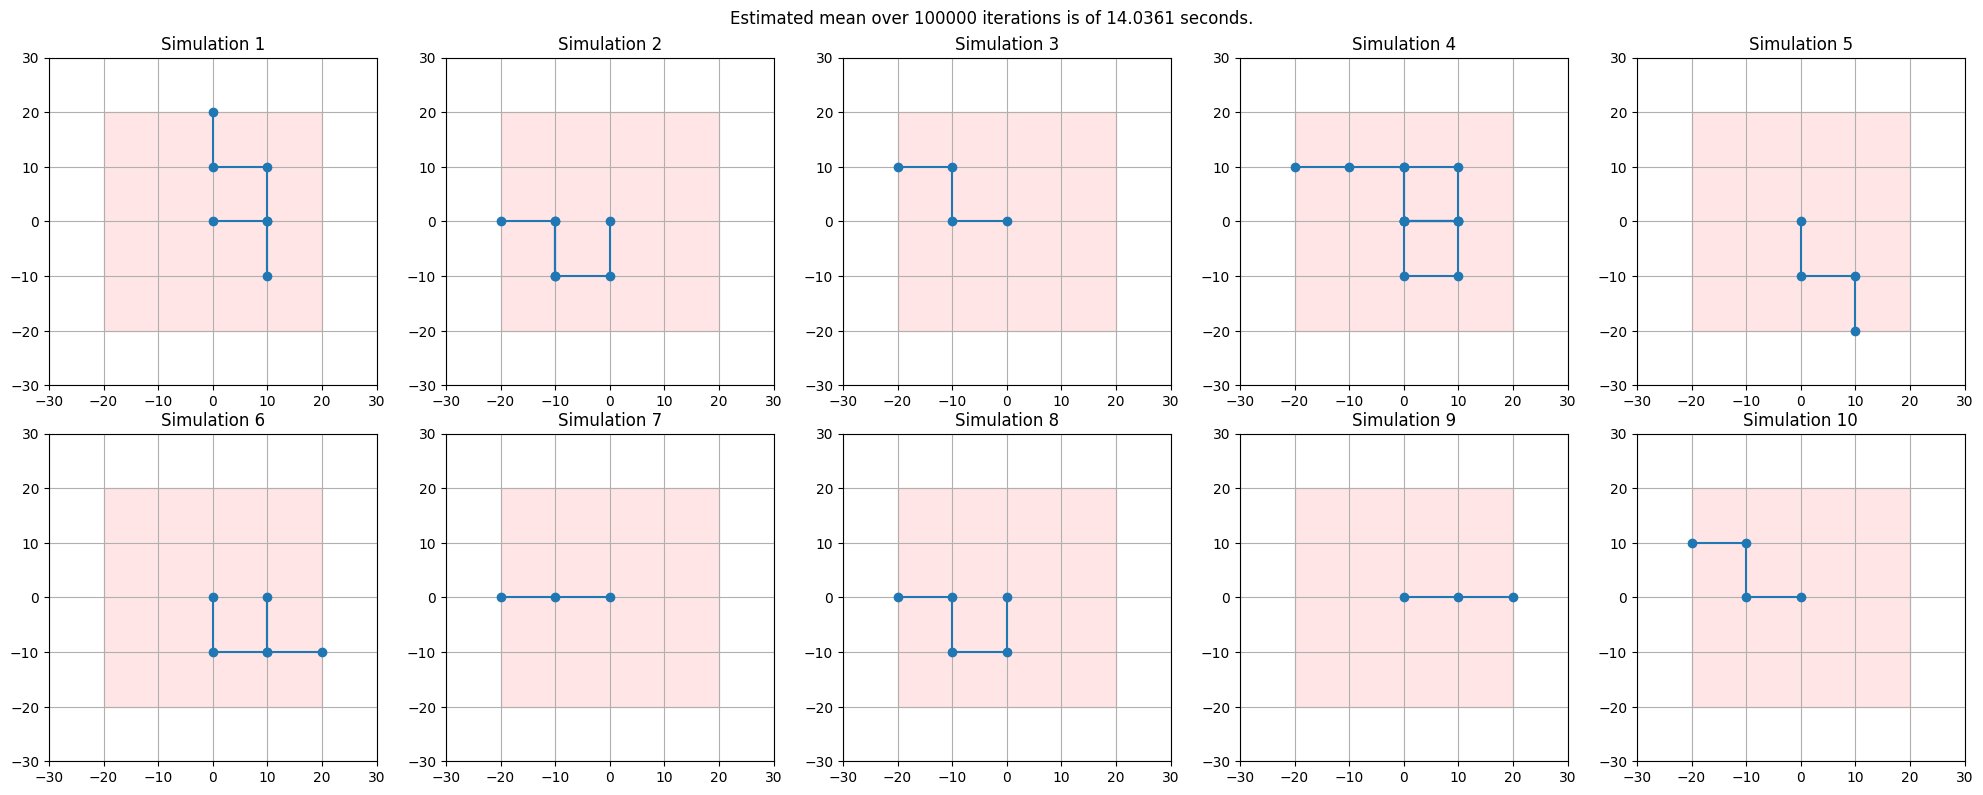

In [ ]:
plot_square_sims("Estimated mean over "+str(n)+" iterations is of "+ str(np.mean(distribution))+ " seconds.")

# Elipse Case

### Code

In [340]:
def ant_run_elipse():

    ant_x = 0
    ant_y = 0
    positions = [(0,0)]
    for step in 10*np.ones(1000):
        direction = np.random.choice([-1, 1])
        ns = np.random.choice([0, 1])
        if ns == 1:
            ant_y += direction*step
            positions.append((ant_x,ant_y))
        else:
            ant_x += direction*step
            positions.append((ant_x,ant_y))

        if ((positions[-1][0]-2.5)/40)**2+((positions[-1][1]-2.5)/30)**2 >= 1:
            return len(positions)-1, positions
        
def simulate_elipse(n):
    distribution = []
    for i in range(n):
        distribution.append(ant_run_elipse()[0])
    return distribution

def plot_elipse_sims(title):

    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        journey = ant_run()[1]
        x_coords = [point[0] for point in journey]
        y_coords = [point[1] for point in journey]
        ax.plot(x_coords, y_coords, marker='o', linestyle='-')
        ellipse = patches.Ellipse((2.5, 2.5), width=32.5, height=42.5, angle=0, edgecolor='black', facecolor='lightblue')
        ax.add_patch(ellipse)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(f'Simulation {i+1}')
        ax.set_aspect('equal', adjustable='box')
        ax.set_xlim(-25, 25)
        ax.set_ylim(-25, 25)
        ax.grid(True)
    fig.suptitle(title)
    plt.tight_layout()
    plt.savefig("elipse_sim.png", dpi=600)
    plt.show()



In [331]:
n = 100000
distribution = simulate_elipse(n)
print(np.mean(distribution), "seconds.")

14.0361 seconds.


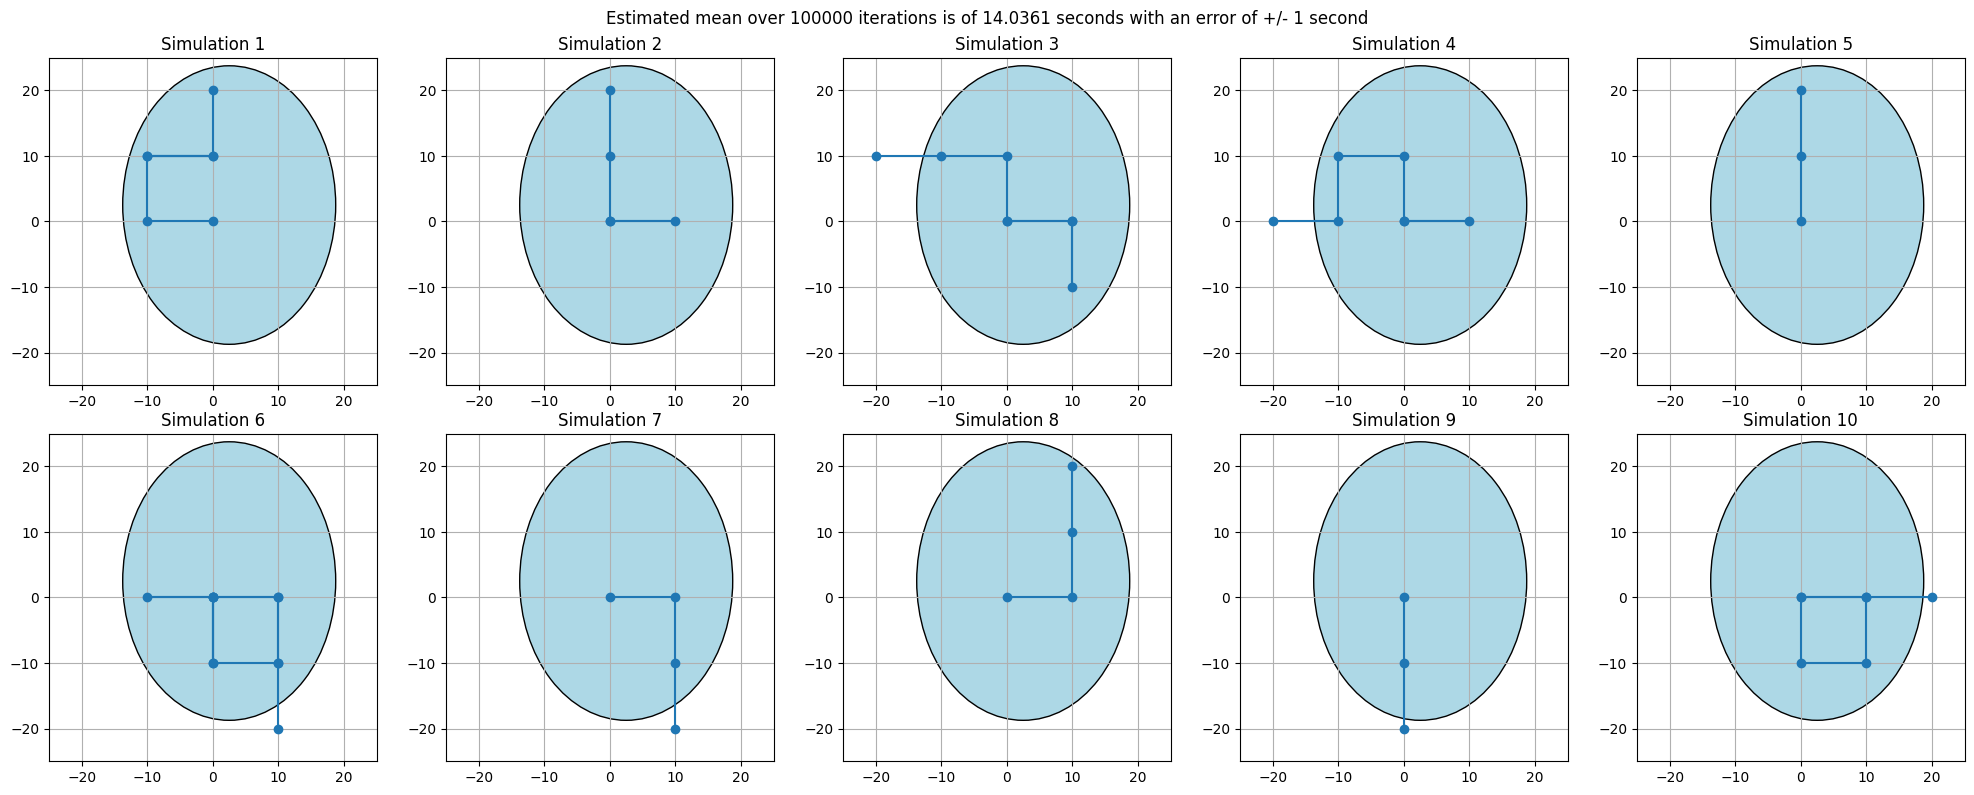

In [341]:
plot_elipse_sims("Estimated mean over "+str(n)+" iterations is of "+ str(np.mean(distribution))+ " seconds with an error of +/- 1 second")
